Hello! This is the code for our 588 project! 

In [30]:
#Get the package we need
import pandas as pd
%matplotlib inline

In [132]:
#Upload Data
data = pd.read_csv('C:/Users/Christopher Cook/Downloads/kaggle/movie_metadata.csv')
list(data)

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [133]:
data = data.dropna(how='any')
data = data.drop(['movie_title','plot_keywords','movie_imdb_link','actor_3_name','actor_2_name','language','genres','num_critic_for_reviews','gross','num_voted_users','num_user_for_reviews','movie_facebook_likes'],axis=1)
data = pd.get_dummies(data)

In [134]:
data.shape

(3756, 3157)

In [135]:
#Make and standardize Y variable
Y = data['imdb_score']
Y = (Y - Y.mean()) / Y.std()

In [136]:
#Make the X matrix. We need to exclude variables that aren't numbers and the Y variable
X = pd.DataFrame()
for col in list(data):
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64' or data[col].dtype == 'uint8') and (col != 'imdb_score'):
        X[col] = (data[col] - data[col].mean()) / data[col].std()

In [137]:
#Import the Machine learning package and split the data into train and test
from sklearn import linear_model
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y)

In [138]:
#declare the model
lasso = linear_model.Lasso(alpha=0.04)

In [139]:
#run the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
#Score the model
lasso.score(X_test, y_test)

0.23904559333150099

In [141]:
#peek at coefs
lasso.coef_

array([ 0.28591817,  0.09216058,  0.        , ...,  0.02592392,
        0.        ,  0.        ])

In [142]:
#for completeness I compare it to a linear regression
linear = linear_model.LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
#Score linear regression.
linear.score(X_test,y_test)

-9.8577033693780313e+28

In [144]:
#get unpenalized coeficients:
X_newtrain = pd.DataFrame()
X_newtest = pd.DataFrame()
for var in range(0, len(list(X))):
    if lasso.coef_[var] > 0.001 or lasso.coef_[var] <  -0.001:
        
        X_newtrain[list(X)[var]] = X_train[list(X)[var]]
        X_newtest[list(X)[var]] = X_test[list(X)[var]]
print(len(list(X_newtrain)))
linear2 = linear_model.LinearRegression()
linear2.fit(X_newtrain,y_train)
linear2.score(X_newtest,y_test)

125


0.26553082338864109

If you're still interested, here's a toy example that shows what lasso can do 

In [16]:
#create the data
import numpy as np
X1 = pd.DataFrame(np.random.uniform(low=0,high=1,size=(1000,100)))
eps = pd.Series(np.random.uniform(low=0,high=1,size=1000))
Y1 = 1/4 * (X1[0] + X1[1] + X1[2] + eps)
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1,Y1)

In [17]:
#create and fit regressions
lasso1 = linear_model.Lasso(alpha=0.002)
linear1 = linear_model.LinearRegression()
lasso1.fit(X1_train,Y1_train)
linear1.fit(X1_train,Y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#score lasso
lasso1.score(X1_test,Y1_test)

0.71561297247833433

In [19]:
#score OLS
linear1.score(X1_test,Y1_test)

0.66220359972372356

As you can see the lasso data did much better on the testing set because it was able to force many of the unimportant coefficients to zero. In fact it looks like only 1 variable outside the true parameters ended up with a non-zero coefficient.

In [20]:
#see lasso params
lasso1.coef_

array([ 0.23409801,  0.22490159,  0.22563334,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.  

In [153]:
frame = pd.DataFrame()
frame['lasso_coef'] = pd.Series(lasso.coef_)
frame['linear_coef']= pd.Series(linear.coef_)

In [154]:
frame['vars'] = pd.Series(list(X))

In [155]:
frame = frame[(frame.lasso_coef > 0.04) | (frame.lasso_coef < -0.04) ]

In [156]:
frame

,lasso_coef,linear_coef,vars
0,0.285918,2.271790e-01,duration
1,0.092161,-5.325400e+02,director_facebook_likes
7,-0.042614,-3.511584e-01,title_year
10,0.044703,2.441222e+12,color_ Black and White
663,-0.054666,2.957982e+11,director_name_Jason Friedberg
1613,-0.050682,2.562029e+11,director_name_Uwe Boll
3038,-0.044879,8.529714e+10,actor_1_name_Usher Raymond
3142,-0.089325,-4.396341e+12,country_USA
3151,-0.070005,-6.906903e+12,content_rating_PG-13


In [129]:
frame.shape

(9, 3)

In [130]:
graph = pd.DataFrame()
graph['actual'] = (y_test * data['imdb_score'].std()) + data['imdb_score'].mean()
graph['predicted'] = (lasso.predict(X_test) * data['imdb_score'].std()) + data['imdb_score'].mean()

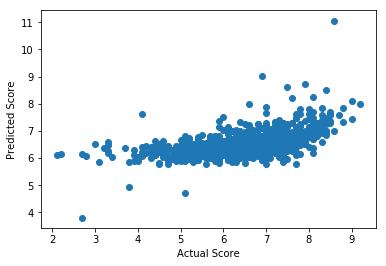

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(graph['actual'].values, graph['predicted'].values)
ax.set_xlabel('Actual Score')
ax.set_ylabel('Predicted Score')
plt.savefig('importances.png', bbox_inches='tight',dpi=300)